In [1]:
import pickle
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualize training metrics

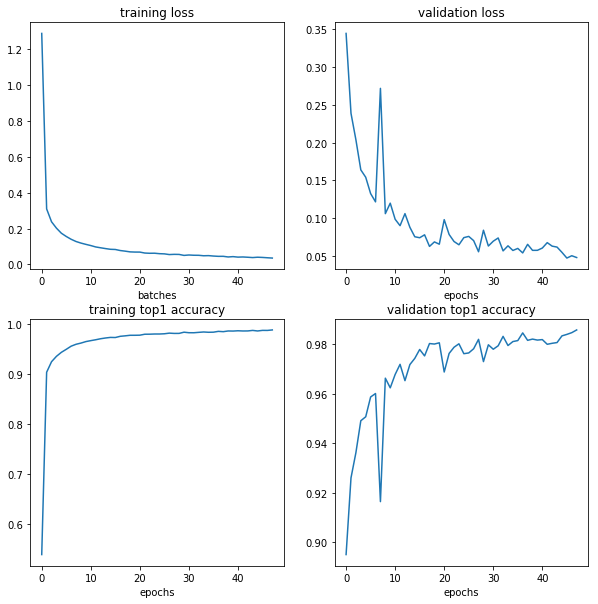

In [2]:
with open('../saved_models/lenet5-tf-yanjiali-loggers-010619.pkl', 'rb') as f:
    loggers = pickle.load(f)
    
train_loss = loggers['train_loss']
val_loss = loggers['val_loss']
val_top1_acc = loggers['val_top1_acc']
train_top1_acc = loggers['train_top1_acc']
    
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.title('training loss')
plt.xlabel('batches')
plt.plot(train_loss['value'])

plt.subplot(2, 2, 2)
plt.title('validation loss')
plt.xlabel('epochs')
plt.plot(val_loss['value'])

plt.subplot(2, 2, 3)
plt.title('training top1 accuracy')
plt.xlabel('epochs')
plt.plot(train_top1_acc['value'])

plt.subplot(2, 2, 4)
plt.title('validation top1 accuracy')
plt.xlabel('epochs')
plt.plot(val_top1_acc['value'])

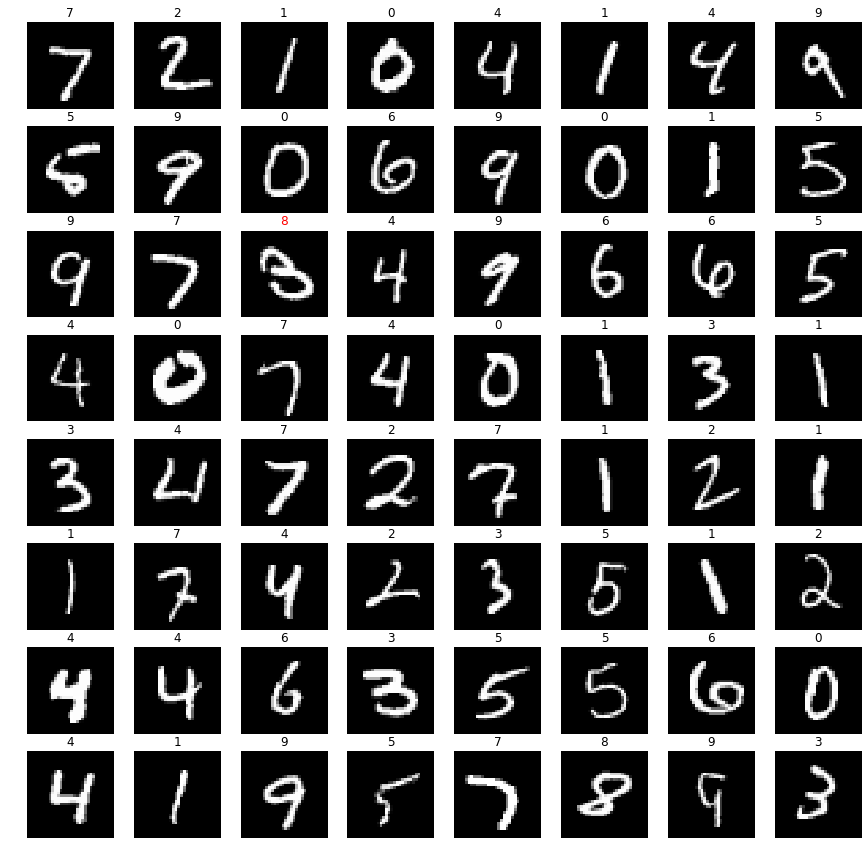

In [3]:
from models.lenet5 import LeNet5
import tensorflow.keras.backend as K

model = LeNet5(input_shape=(32, 32, 1))
model.load_weights('../saved_models/lenet5-tf-yanjiali-010619.hdf5')

def preprocess(x):
    # pad the image from 28x28 to 32x32
    x = np.pad(x, ((0, 0), (2, 2), (2, 2)), 'constant')
    # add channel dimension 32x32x1
    x = np.expand_dims(x, axis=-1)
    # normalize the input image
    x = x / 255.0
    return x

images = preprocess(x_test[:64])
labels = y_test[:64]

output = model.predict(images, batch_size=64)
digits = K.eval(K.argmax(output))

plt.figure(figsize=(15,15))

for i in range(8):
    for j in range(8):
        idx = i * 8 + j
        plt.subplot(8, 8, idx + 1)
        img = images[idx].squeeze()
        actual = labels[idx]
        predicted = digits[idx]
        if actual != predicted:
            plt.title(predicted, color='r')
        else:
            plt.title(predicted)
        plt.axis('off')
        plt.imshow(img, cmap='gray')
        plt.grid(True)